# Notebook for the Production Degradation Chemical Reaction Network

Production and Degradation Chemical Reaction Network: $\emptyset \xrightleftharpoons[\theta_2]{\theta_1} S$.

In [1]:
import sys
sys.path.append('../')

import numpy as np
import torch

import neuralnetwork
import convert_csv
import plot
import save_load_MDN

from scipy.stats import poisson

from CRN2_production_degradation import propensities_production_degradation as propensities

## Importing data

In [2]:
FILE_NAME = 'data'
CRN_NAME = 'production_degradation'
NUM_PARAMS = 2

In [3]:
# loading data
X_train1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_train1.csv')
X_train2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_train2.csv')
X_train3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_train3.csv')
y_train1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_train1.csv')
y_train2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_train2.csv')
y_train3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_train3.csv')
X_valid1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_valid1.csv')
X_valid2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_valid2.csv')
X_valid3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_valid3.csv')
y_valid1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_valid1.csv')
y_valid2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_valid2.csv')
y_valid3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_valid3.csv')
X_test = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_test.csv')
y_test = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_test.csv')

train_data1 = [X_train1, y_train1]
valid_data1 = [X_valid1, y_valid1]
train_data2 = [X_train2, y_train2]
valid_data2 = [X_valid2, y_valid2]
train_data3 = [X_train3, y_train3]
valid_data3 = [X_valid3, y_valid3]

## Hyperparameters

In [4]:
LR = 0.005
N_ITER  = 700
BATCHSIZE = 32
N_HIDDEN = 256
MIXTURE = 'NB'
N_COMPS = 4

## Training models

We train 3 different models to compare their accuracy.

In [11]:
model1 = neuralnetwork.NeuralNetwork(n_comps=N_COMPS, n_params=NUM_PARAMS, n_hidden=N_HIDDEN, mixture=MIXTURE)
model2 = neuralnetwork.NeuralNetwork(n_comps=N_COMPS, n_params=NUM_PARAMS, n_hidden=N_HIDDEN, mixture=MIXTURE)
model3 = neuralnetwork.NeuralNetwork(n_comps=N_COMPS, n_params=NUM_PARAMS, n_hidden=N_HIDDEN, mixture=MIXTURE)

Mixture Density Network created.
Mixture Density Network created.
Mixture Density Network created.


In [12]:
train_losses1, valid_losses1 = neuralnetwork.train_NN(model1, train_data1, valid_data1, loss=neuralnetwork.loss_kldivergence, max_rounds=N_ITER, lr=LR, batchsize=BATCHSIZE)
train_losses2, valid_losses2 = neuralnetwork.train_NN(model2, train_data2, valid_data2, loss=neuralnetwork.loss_kldivergence, max_rounds=N_ITER, lr=LR, batchsize=BATCHSIZE)
train_losses3, valid_losses3 = neuralnetwork.train_NN(model3, train_data3, valid_data3, loss=neuralnetwork.loss_kldivergence, max_rounds=N_ITER, lr=LR, batchsize=BATCHSIZE)

Training ...: 100%|█████████▉| 699/700 [05:59<00:00,  1.95it/s]


Learning rate: 2.5177519986929707e-08,
Train loss: 0.0006853821105323732,
 Valid loss: 0.0006855721003375947


Training ...: 100%|█████████▉| 699/700 [06:15<00:00,  1.86it/s]


Learning rate: 2.5177519986929707e-08,
Train loss: 0.0006794696091674268,
 Valid loss: 0.0006899524596519768


Training ...: 100%|█████████▉| 699/700 [05:03<00:00,  2.30it/s]

Learning rate: 2.5177519986929707e-08,
Train loss: 0.0006819281843490899,
 Valid loss: 0.0006653888267464936


In [13]:
for i, model in enumerate([model1, model2, model3]):
    save_load_MDN.save_MDN_model(model, f'CRN2_model{i+1}.pt')

## Loading models

In [5]:
model1 = save_load_MDN.load_MDN_model('saved_models/CRN2_model1.pt')
model2 = save_load_MDN.load_MDN_model('saved_models/CRN2_model2.pt')
model3 = save_load_MDN.load_MDN_model('saved_models/CRN2_model3.pt')

Mixture Density Network created.
Mixture Density Network created.
Mixture Density Network created.


In [15]:
# Compute losses

print("Model 1")
print(f"KLD : {neuralnetwork.mean_loss(X_test, y_test, model1, loss=neuralnetwork.loss_kldivergence)}")
print(f'Hellinger : {neuralnetwork.mean_loss(X_test, y_test, model1, loss=neuralnetwork.loss_hellinger)}')

print("\nModel 2")
print(f"KLD : {neuralnetwork.mean_loss(X_test, y_test, model2, loss=neuralnetwork.loss_kldivergence)}")
print(f'Hellinger : {neuralnetwork.mean_loss(X_test, y_test, model2, loss=neuralnetwork.loss_hellinger)}')

print("\nModel 3")
print(f"KLD : {neuralnetwork.mean_loss(X_test, y_test, model3, loss=neuralnetwork.loss_kldivergence)}")
print(f'Hellinger : {neuralnetwork.mean_loss(X_test, y_test, model3, loss=neuralnetwork.loss_hellinger)}')


Model 1
KLD : 0.0006963131600059569
Hellinger : 0.012953481636941433

Model 2
KLD : 0.0006870083743706346
Hellinger : 0.012884681113064289

Model 3
KLD : 0.0006870803772471845
Hellinger : 0.012893187813460827


In [8]:
import get_sensitivities
print(get_sensitivities.sensitivities(X_test[996,:], model1, 1_000)[:,1:].sum(axis=0))
print(get_sensitivities.sensitivities(X_test[996,:], model2, 1_000)[:,1:].sum(axis=0))
print(get_sensitivities.sensitivities(X_test[996,:], model3, 1_000)[:,1:].sum(axis=0))

tensor([ 8.5151e-06, -2.5563e-05])
tensor([ 7.6685e-06, -4.1176e-05])
tensor([ 4.6585e-06, -1.3050e-05])


## Probability mass function

Given an initial condition of 0 $S$, the population of $S$ at any later time is a random integer sampled from a Poisson distribution:

$$p(x; t, \theta) = \frac{\big( \lambda_t^\theta \big)^x e^{-\lambda_t^\theta}}{x!} \text{ where } \lambda_t^\theta = \frac{\theta_1}{\theta_2}\big(1-e^{-\theta_2 t}\big)$$

In [16]:
def production_degradation_distribution(x, params):
    t, theta1, theta2 = params
    lambd = theta1*(1-np.exp(-theta2*t))/theta2
    return poisson.pmf(x, lambd)

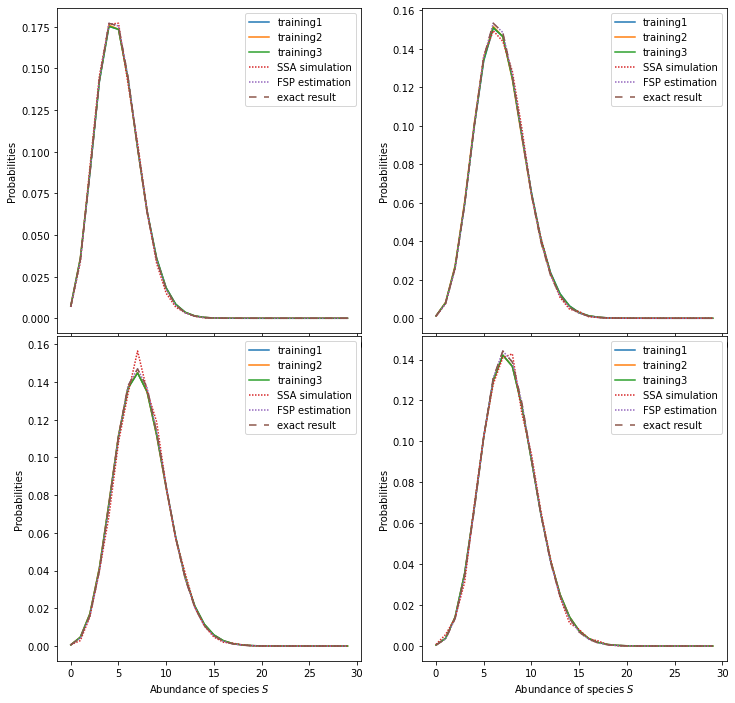

In [17]:
plot.multiple_plots(to_pred=[X_test[996+k,:] for k in range(4)], 
                    models=[model1, model2, model3], 
                    up_bound=4*[30],
                    time_windows=np.array([20]),
                    n_comps=N_COMPS,
                    plot_exact_result=(True, production_degradation_distribution), 
                    plot_test_result=(True, [y_test[996+k,:] for k in range(4)]),
                    plot_fsp_result=(True, 
                                    propensities.stoich_mat, 
                                    propensities.propensities,
                                    None, 
                                    30, 
                                    propensities.init_state, 
                                    propensities.ind_species,
                                    2,
                                    0),
                    save=(False, "CRN2_SI_fig1.pdf"))

For a time further in the future than the training range:

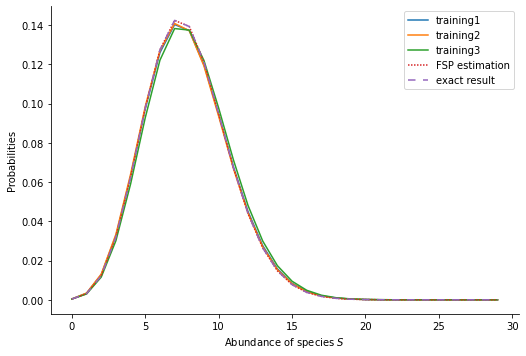

In [23]:
plot.plot_model(to_pred=torch.tensor([30., 1.5665, 0.1997]), 
                models=[model1, model2, model3], 
                up_bound=30, 
                time_windows=np.array([30]),
                n_comps=N_COMPS,
                plot_exact_result=(True, production_degradation_distribution),
                plot_fsp_result=(True, 
                                propensities.stoich_mat, 
                                propensities.propensities, 
                                None,
                                30, 
                                propensities.init_state, 
                                propensities.ind_species,
                                2,
                                0),
                save=(False, "CRN2_SI_fig2.pdf"))

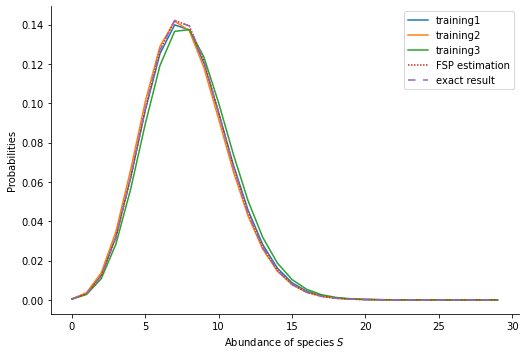

In [22]:
plot.plot_model(to_pred=torch.tensor([40., 1.5665, 0.1997]), 
                models=[model1, model2, model3], 
                up_bound=30, 
                time_windows=np.array([40]),
                n_comps=N_COMPS,
                plot_exact_result=(True, production_degradation_distribution),
                plot_fsp_result=(True, 
                                propensities.stoich_mat, 
                                propensities.propensities, 
                                None,
                                30, 
                                propensities.init_state, 
                                propensities.ind_species,
                                2,
                                0),
                save=(False, "CRN2_SI_fig2.pdf"))

For parameters outside of the training range:

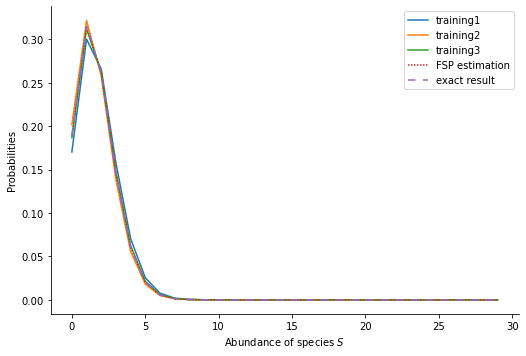

In [24]:
plot.plot_model(to_pred=torch.tensor([10., 5., 3.]), 
                models=[model1, model2, model3], 
                up_bound=30, 
                time_windows=np.array([20]),
                n_comps=N_COMPS,
                plot_exact_result=(True, production_degradation_distribution),
                plot_fsp_result=(True, 
                                propensities.stoich_mat, 
                                propensities.propensities,
                                None, 
                                30, 
                                propensities.init_state, 
                                propensities.ind_species,
                                2,
                                0),
                save=(False, ''))

## Sensitivity of the likelihood

We set $p(-1;t,\theta)=0$ by convention. 

### With respect to $\theta_1$

$$\frac{\partial p}{\partial \theta_1} (x;t, \theta) = \frac{\lambda_t^\theta}{\theta_1} \big[ p(x-1; t, \theta) - p(x; t,\theta) \big]$$

In [25]:
def production_degradation_stv_1(x, params):
    t, theta1, theta2 = params[0], params[1], params[2]
    lambd = theta1*(1-np.exp(-theta2*t))/theta2
    return lambd/theta1 * (poisson.pmf(x-1, lambd) - poisson.pmf(x, lambd))

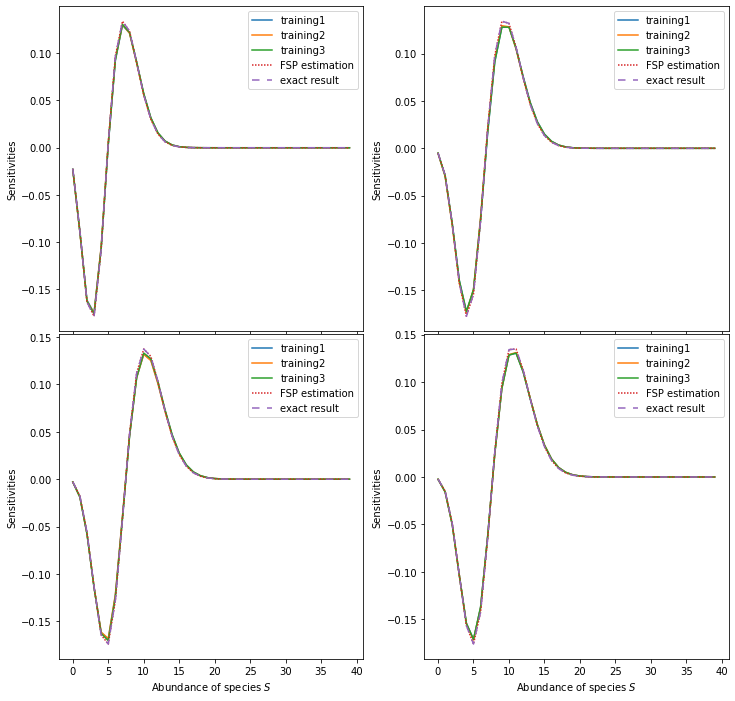

In [26]:
plot.multiple_plots(to_pred=[X_test[996+k,:] for k in range(4)], 
                    models=[model1, model2, model3], 
                    up_bound=[40]*4,
                    time_windows=np.array([20]),
                    n_comps=N_COMPS,
                    index_names=('Sensitivities', r'Abundance of species $S$'),
                    plot_exact_result=(True, production_degradation_stv_1),
                    plot_fsp_result=(True, 
                                    propensities.stoich_mat, 
                                    propensities.propensities,
                                    None, 
                                    30, 
                                    propensities.init_state, 
                                    propensities.ind_species,
                                    2,
                                    0),
                    plot=('sensitivities', 0), 
                    save=(False, 'CRN2_fig1.pdf'))

Check a time outside of the training range:

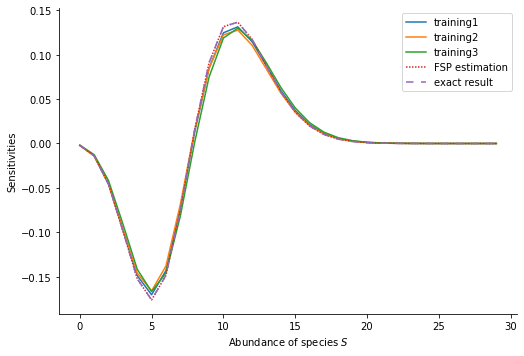

In [27]:
plot.plot_model(to_pred=torch.tensor([30., 1.5665, 0.1997]), 
                models=[model1, model2, model3], 
                up_bound=30, 
                time_windows=np.array([30]),
                n_comps=N_COMPS,
                index_names=('Sensitivities', r'Abundance of species $S$'),
                plot_exact_result=(True, production_degradation_stv_1),
                plot_fsp_result=(True, 
                                propensities.stoich_mat, 
                                propensities.propensities,
                                None, 
                                30, 
                                propensities.init_state, 
                                propensities.ind_species,
                                2,
                                0),
                plot=('sensitivities', 0), 
                save=(False, "CRN2_fig2.pdf"))

Check parameters outside of the training range:

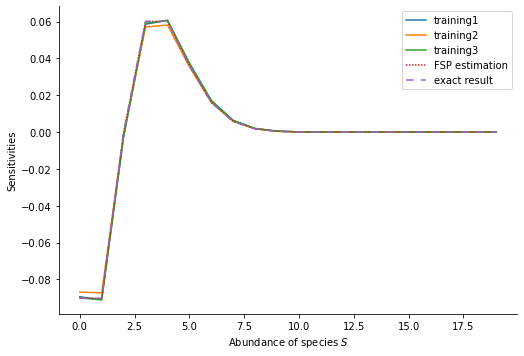

In [28]:
plot.plot_model(to_pred=torch.tensor([10., 3., 1.5]), 
                models=[model1, model2, model3], 
                up_bound=20, 
                time_windows=np.array([20]),
                n_comps=N_COMPS,
                index_names=('Sensitivities', r'Abundance of species $S$'), 
                plot_exact_result=(True, production_degradation_stv_1),
                plot_fsp_result=(True, 
                                propensities.stoich_mat, 
                                propensities.propensities, 
                                None,
                                30, 
                                propensities.init_state, 
                                propensities.ind_species,
                                2,
                                0),
                plot=('sensitivities', 0),
                save=(False, ''))

### With respect to $\theta_2$

$$\frac{\partial p}{\partial \theta_2}(x;t,\theta) = \Big( - \frac{\lambda_t^\theta}{\theta_2} + \frac{\theta_1}{\theta_2} t e^{-\theta_2 t}\Big) \big[ p(x-1;t,\theta) - p(x;t,\theta) \big]$$

In [29]:
def production_degradation_stv_2(x, params):
    t, theta1, theta2 = params[0], params[1], params[2]
    lambd = theta1*(1-np.exp(-theta2*t))/theta2
    return (-lambd/theta2 + theta1/theta2*t*np.exp(-t*theta2)) * (poisson.pmf(x-1, lambd) - poisson.pmf(x, lambd))

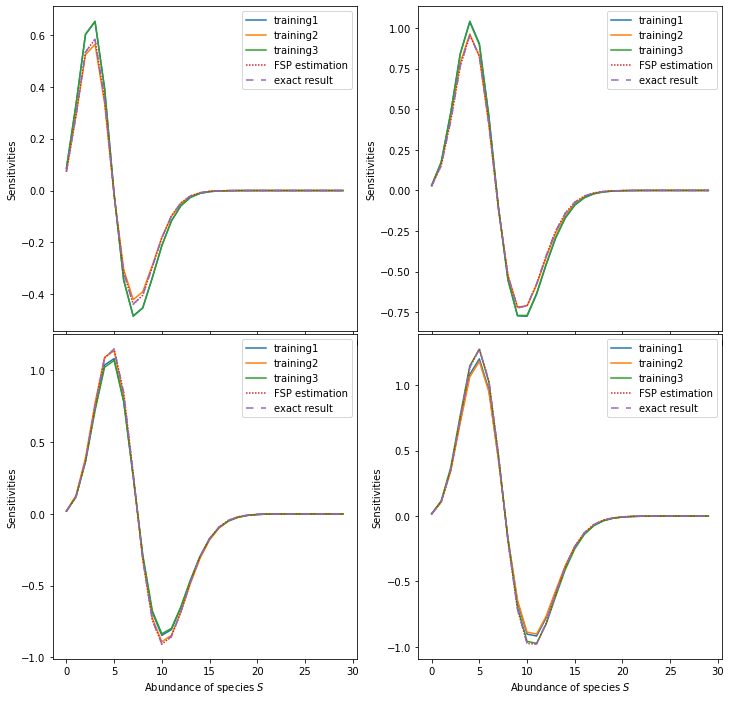

In [30]:
plot.multiple_plots(to_pred=[X_test[996+k,:] for k in range(4)], 
                    models=[model1, model2, model3], 
                    up_bound=[30]*4, 
                    time_windows=np.array([20]),
                    n_comps=N_COMPS,
                    index_names=('Sensitivities', r'Abundance of species $S$'),
                    plot_exact_result=(True, production_degradation_stv_2),
                    plot_fsp_result=(True, 
                                    propensities.stoich_mat, 
                                    propensities.propensities, 
                                    None,
                                    30, 
                                    propensities.init_state, 
                                    propensities.ind_species,
                                    2,
                                    0),
                    plot=('sensitivities', 1),
                    save=(False, "CRN2_SI_fig3.pdf"))

For a time further in the future than the training range:

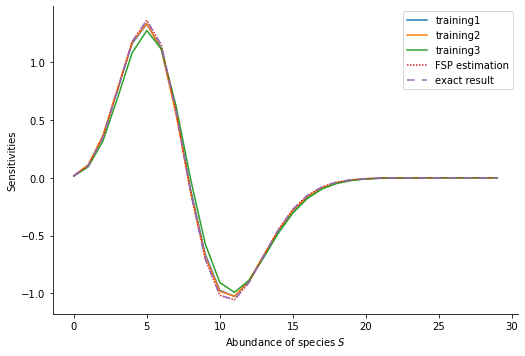

In [31]:
plot.plot_model(to_pred=torch.tensor([30., 1.5665, 0.1997]), 
            models=[model1, model2, model3], 
            up_bound=30, 
            time_windows=np.array([30]),
            n_comps=N_COMPS,
            index_names=('Sensitivities', r'Abundance of species $S$'),
            plot_exact_result=(True, production_degradation_stv_2),
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            None,
                            30, 
                            propensities.init_state, 
                            propensities.ind_species,
                            2,
                            0),
            plot=('sensitivities', 1),
            save=(False, "CRN2_SI_fig4.pdf"))

For parameters outside of the training range:

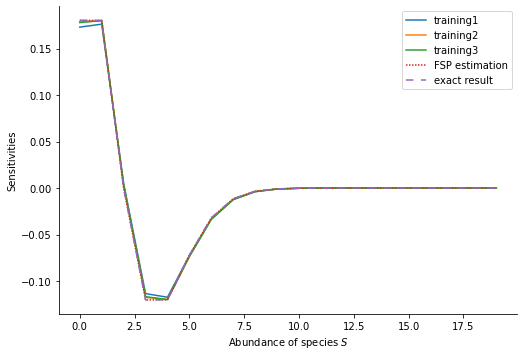

In [32]:
plot.plot_model(to_pred=torch.tensor([10., 3., 1.5]), 
                models=[model1, model2, model3], 
                up_bound=20, 
                time_windows=np.array([20]),
                n_comps=N_COMPS,
                index_names=('Sensitivities', r'Abundance of species $S$'),
                plot_exact_result=(True, production_degradation_stv_2),
                plot_fsp_result=(True, 
                                propensities.stoich_mat, 
                                propensities.propensities,
                                None, 
                                30, 
                                propensities.init_state, 
                                propensities.ind_species,
                                2,
                                0),
                plot=('sensitivities', 1),
                save=(False, ''))

## Fisher information

\begin{align*}
[\mathcal{I}_t^\theta]_{11} &= \frac{\lambda_t^\theta}{\theta_1^2} \\
[\mathcal{I}_t^\theta]_{22} &= \Big( - \frac{1}{\theta_2} + \frac{t}{e^{\theta_2 t}-1} \Big)^2 \lambda_t^\theta
\end{align*}

In [33]:
def exact_fi_1(t, params):
    theta1, theta2 = params[0], params[1]
    lambd = theta1/theta2*(1-np.exp(-theta2*t))
    return lambd/theta1**2

In [34]:
def exact_fi_2(t, params):
    theta1, theta2 = params[0], params[1]
    lambd = theta1/theta2*(1-np.exp(-theta2*t))
    return lambd*(-1/theta2 + t/(np.exp(theta2*t)-1))**2

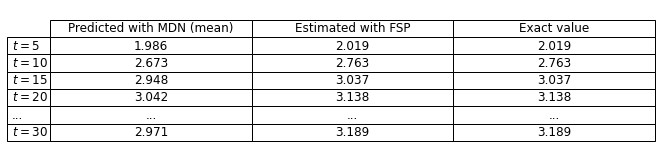

In [35]:
plot.fi_table(time_samples=np.array([5, 10, 15, 20, 30]), 
            params=X_test[996,1:].numpy(), 
            ind_param=0,
            time_windows=np.array([30]),
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_exact_result=(True, exact_fi_1),
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            None,
                            200, 
                            propensities.init_state, 
                            propensities.ind_species,
                            2,
                            0),
            up_bound=200,
            out_of_bounds_index=4,
            save=(False, "CRN2_fig3.pdf"))

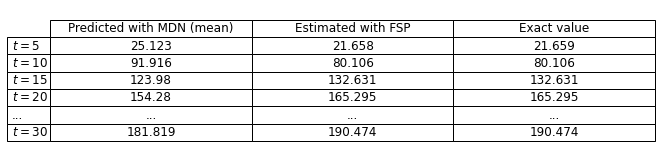

In [36]:
plot.fi_table(time_samples=np.array([5, 10, 15, 20, 30]), 
                params=X_test[996,1:].numpy(), 
                ind_param=1,
                time_windows=np.array([30]),
                models=(True, [model1, model2, model3], N_COMPS), 
                plot_exact_result=(True, exact_fi_2),
                plot_fsp_result=(True, 
                                propensities.stoich_mat, 
                                propensities.propensities, 
                                None,
                                200, 
                                propensities.init_state, 
                                propensities.ind_species,
                                2,
                                0),
                up_bound=200,
                out_of_bounds_index=4,
                save=(False, 'CRN2_fig4.pdf'))

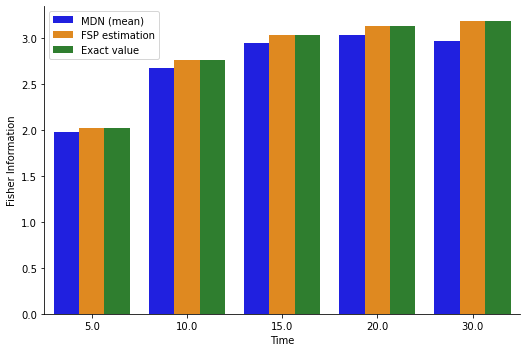

In [37]:
plot.fi_barplots(time_samples=np.array([5, 10, 15, 20, 30]), 
                params=X_test[996,1:].numpy(), 
                ind_param=0,
                time_windows=np.array([30]),
                models=(True, [model1, model2, model3], N_COMPS), 
                plot_exact_result=(True, exact_fi_1),
                plot_fsp_result=(True, 
                                propensities.stoich_mat, 
                                propensities.propensities, 
                                None,
                                200, 
                                propensities.init_state, 
                                propensities.ind_species,
                                2,
                                0),
                up_bound=200,
                save=(False, 'CRN2_bars_fig3.pdf'),
                colors=['blue', 'darkorange', 'forestgreen'])

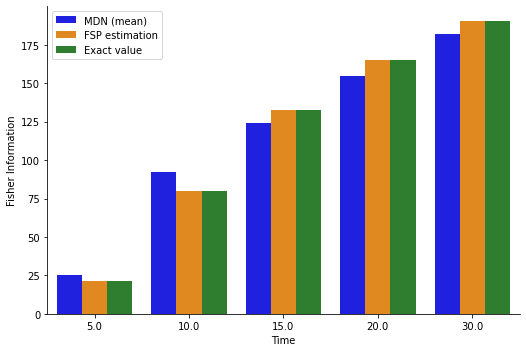

In [39]:
plot.fi_barplots(time_samples=np.array([5, 10, 15, 20, 30]), 
                params=X_test[996,1:].numpy(), 
                ind_param=1,
                time_windows=np.array([30]),
                models=(True, [model1, model2, model3], N_COMPS), 
                plot_exact_result=(True, exact_fi_2),
                plot_fsp_result=(True, 
                                propensities.stoich_mat, 
                                propensities.propensities, 
                                None,
                                200, 
                                propensities.init_state, 
                                propensities.ind_species,
                                2,
                                0),
                up_bound=200,
                save=(False, 'CRN2_bars_fig4.pdf'),
                colors=['blue', 'darkorange', 'forestgreen'])